# Census Analysis

The goal of this project is to predict income levels based on data collected in the US census. The income levels are binned at below 50K and above 50K. This is a biniary classification problem.
The full dataset will be split into two parts. One for training at 2/3 of the full set. And the other for testing at 1/3 of the full set.

**Initial Data Wrangling and Data Collection**

In [18]:
# Importing necessary modules
import pandas as pd
import numpy as np

In [19]:
# Loading in data as csv file
train = pd.read_csv('data/census-income-train.csv', header=None)
test = pd.read_csv('data/census-income-test.csv')

### Alternate Hypothesis

Education, age, and sex have an affect on a persons income level.

After confirming one of the above hypotheses the way will be opened to perform some prediction models based on useful columns in the dataset.

### Contents

1. Data Wrangling -- collect, organize, define, clean
2. Exploratory Data Analysis

**Initial Data Collection and Clean**

In [2]:
# Importing necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.graphics.api import abline_plot

In [3]:
# Loading in data as csv file
census = pd.read_csv('data/census-data.csv', header=None)

In [4]:
census.head()

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,- 50000.
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,- 50000.
2,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,...,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,- 50000.
3,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.
4,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.


In [5]:
census.shape

(199523, 42)

In [6]:
census.columns

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41],
           dtype='int64')

**Data Definition**

In [7]:
# Creating list of column names to apply to dataframe
column_names = ['age', 'worker_class', 'industry_recode', 'occupation_recode', 'education',
                'wage_per_hour', 'edu_enroll_last_week', 'marital_stat', 'industry_code',
                'occupation_code', 'race', 'hispanic_origin', 'sex', 'member_of_union', 'reason_unemployment',
                'full_part_employment_stat', 'capital_gains', 'capital_losses', 'stock_divs', 'tax_filler_stat',
                'region_prev_residence', 'state_prev_residence', 'household_family_stat', 'household_summary_in',
                'instance_weight', 'migration_code_change_msa', 'migration_code_change_reg',
                'migration_codemove_reg', 'in_house_one_yearago', 'migration_prev_res_sunbelt', 'persons_worked_for_employer',
                'family_members_under_18', 'country_of_birth_father', 'country_of_birth_mother', 'country_of_birth', 
                'citizenship', 'own_business_or_self_employed', 'veterans_questionnaire', 'veterans_benefits', 
                'weeks_worked_year', 'year', 'income']

In [8]:
# Setting column names for both data sets
census.columns = column_names

**Overview**

There are a total of 42 columns in this data set. The goal here would be to determine the viablity of each column as it pertains to the project analysis. Some of these columns might not be usable in this analysis. While others will need some wrangling to ensure that are used appropriately. To begin there will be some EDA to ascertain the details of the features included in this dataset.

What variables could affect the income level of an indivudial?
- age
- race
- industry
- occupation
- education
- employment status
- hours worked
- tax status
- marital status
- region
- dependants
- investments and returns

There are likely more variables that play into this, but this is a good start point for now.

In [9]:
# checking unique values
census.income.unique()

array([' - 50000.', ' 50000+.'], dtype=object)

In [10]:
# assigning 1 or 0 based on income category
census.income = pd.Series(np.where(census.income.values == ' 50000+.', 1, 0),
                       census.index)

# sanity check
print(census.income.value_counts())

0    187141
1     12382
Name: income, dtype: int64


In [11]:
# dropping irrelevant columns
census.drop(columns=['industry_recode', 'occupation_recode', 'weeks_worked_year'], inplace=True)

The majority of the population are under 40 years of age. 
Persons under 16 will most likely not be making an income and therefore are not applicable to this particluar problem.

In [12]:
# removed entries under the age of 16
census = census[census.age >= 16]

In [13]:
census.shape

(149175, 39)

Here the education column is getting reorganized and cleaned for analysis

In [14]:
census['education'] = census.loc[:, ('education')].str.replace(' ', '')
census.education.unique()

array(['Highschoolgraduate', 'Somecollegebutnodegree', '10thgrade',
       'Bachelorsdegree(BAABBS)', 'Mastersdegree(MAMSMEngMEdMSWMBA)',
       'Lessthan1stgrade', 'Associatesdegree-academicprogram',
       '7thand8thgrade', '12thgradenodiploma',
       'Associatesdegree-occup/vocational',
       'Profschooldegree(MDDDSDVMLLBJD)', '5thor6thgrade', '11thgrade',
       'Doctoratedegree(PhDEdD)', '9thgrade', '1st2nd3rdor4thgrade'],
      dtype=object)

Cleaning and organizing the age column.

- NoHighschool = 10thgrade, Lessthan1stgrade, 7thand8thgrade, 12thgradenodiploma, 5thor6thgrade, 11thgrade, 9thgrade, 1st2nd3rdor4thgrade

- Highschool = Highschoolgraduate, Somecollegebutnodegree
- AssociatesDegree = Associatesdegree-academicprogram, Associatesdegree-occup/vocational
- BachelorsDegree = Bachelorsdegree(BAABBS)
- MastersDegree = Mastersdegree(MAMSMEngMEdMSWMBA)
- MedSchool = Profschooldegree(MDDDSDVMLLBJD)
- DoctorateDegree = Doctoratedegree(PhDEdD)

In [15]:
# creating a set of variable for replacing the old values in the education column
noHighSchool = ['10thgrade', 'Lessthan1stgrade', '7thand8thgrade', 
                '12thgradenodiploma', '5thor6thgrade', '11thgrade', '9thgrade', '1st2nd3rdor4thgrade']

highschool = ['Highschoolgraduate', 'Somecollegebutnodegree']

associates = ['Associatesdegree-academicprogram', 'Associatesdegree-occup/vocational']
BachelorsDegree = 'Bachelorsdegree(BAABBS)'
MastersDegree = 'Mastersdegree(MAMSMEngMEdMSWMBA)'
MedSchool = 'Profschooldegree(MDDDSDVMLLBJD)'
DoctorateDegree = 'Doctoratedegree(PhDEdD)'

In [16]:
# Replacing old values with new
for i in noHighSchool:
    census.loc[census.education == i, 'education'] = 'NoHighSchool'
    
for i in highschool:
    census.loc[census.education == i, 'education'] = 'HighSchool'

for i in associates:
    census.loc[census.education == i, 'education'] = 'AssociatesDegree'

census.loc[census.education == 'Bachelorsdegree(BAABBS)', 'education'] = 'BachelorsDegree'
census.loc[census.education == 'Mastersdegree(MAMSMEngMEdMSWMBA)', 'education'] = 'MastersDegree'
census.loc[census.education == 'Profschooldegree(MDDDSDVMLLBJD)', 'education'] = 'MedSchool'
census.loc[census.education == 'Doctoratedegree(PhDEdD)', 'education'] = 'DoctorateDegree'

In [17]:
census.education.unique()

# Success!

array(['HighSchool', 'NoHighSchool', 'BachelorsDegree', 'MastersDegree',
       'AssociatesDegree', 'MedSchool', 'DoctorateDegree'], dtype=object)

[Text(0.5, 0, 'Education'), Text(0, 0.5, 'Count')]

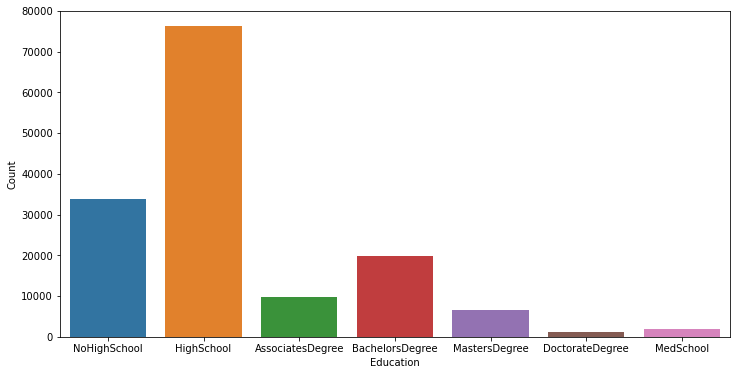

In [18]:
fig, ax = plt.subplots(figsize=(12, 6))
order = ['NoHighSchool', 'HighSchool', 'AssociatesDegree', 'BachelorsDegree', 'MastersDegree', 'DoctorateDegree', 'MedSchool']

sns.countplot(x='education', data=census, order=order)
ax.set(xlabel='Education', ylabel='Count')

In [19]:
census['year'].value_counts()

95    74660
94    74515
Name: year, dtype: int64

Is the census year relavent? 

In [20]:
incomes_94 = census.loc[census.year == 94, 'income'].value_counts()
incomes_95 = census.loc[census.year == 95, 'income'].value_counts()

print('1995 census income category counts\n')
print(incomes_95)
print('\n1994 income category counts\n')
print(incomes_94)
print('\nThe difference between years. Remember the value of 1 denotes more than 50,000.\n')
print(incomes_95 - incomes_94)

1995 census income category counts

0    68117
1     6543
Name: income, dtype: int64

1994 income category counts

0    68676
1     5839
Name: income, dtype: int64

The difference between years. Remember the value of 1 denotes more than 50,000.

0   -559
1    704
Name: income, dtype: int64


In [21]:
census.age.describe()

count    149175.000000
mean         43.621351
std          18.128950
min          16.000000
25%          29.000000
50%          41.000000
75%          56.000000
max          90.000000
Name: age, dtype: float64

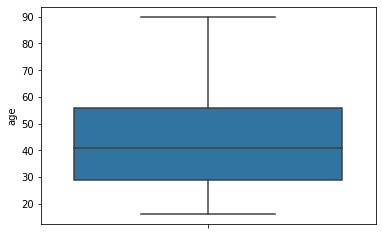

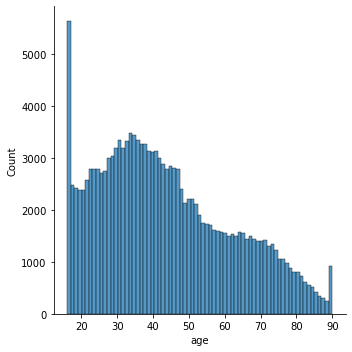

In [22]:
fig, ax = plt.subplots()
sns.boxplot(y='age', data=census)
sns.displot(x='age', data=census)

In [23]:
female_age = census.loc[census['sex'] == 'Female', 'age']
male_age = census.loc[census['sex'] == 'Male', 'age']

female_age.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: age, dtype: float64

In [24]:
male_age.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: age, dtype: float64

In [25]:
census.race.value_counts()

 White                          127185
 Black                           13939
 Asian or Pacific Islander        4291
 Other                            2295
 Amer Indian Aleut or Eskimo      1465
Name: race, dtype: int64

According to some research the African American population accounted for about 13% of the total.
But for some reason this data does not represent that. Here the percentage is closer to 9%

In [26]:
# removing extra whitespace
census['sex'] = census.loc[:, ('sex')].str.replace(' ', '')

In [27]:
census.sex.value_counts()

Female    79210
Male      69965
Name: sex, dtype: int64

Interestingly, the amount of females recorded is aprx. 10000 more than males.

In [28]:
census.loc[census['sex'] == 'Female', 'income'].value_counts()


0    76547
1     2663
Name: income, dtype: int64

In [29]:
2663/76547

0.03478908383084902

76547 Females in this survey made less than 50k\
2663 Females made more than 50k\
\
The percentage of female earners above 50k is 3.48%

In [30]:
census.loc[census['sex'] == 'Male', 'income'].value_counts()


0    60246
1     9719
Name: income, dtype: int64

In [31]:
9719/60246

0.1613219134880324

60246 Males made less than 50k\
9719 Males made more than 50k\
\
The percentage of male earners above 50k is 16.13%

### Test Male/Female income percetages

This will ensure that either the numbers are random or consistent with a 95% confidence interval.

Let us first check on some correlations

In [32]:
census.corr()

,age,wage_per_hour,capital_gains,capital_losses,stock_divs,instance_weight,persons_worked_for_employer,own_business_or_self_employed,veterans_benefits,year,income
age,1.000000,-0.064628,0.022428,0.011687,0.091606,-0.048131,-0.313186,-0.189074,-0.104019,0.003029,0.043893
wage_per_hour,-0.064628,1.000000,-0.007398,0.001893,-0.012567,0.008752,0.156229,0.033690,0.011687,0.002119,0.007281
capital_gains,0.022428,-0.007398,1.000000,-0.017018,0.128769,0.000337,0.037170,0.005410,0.002109,0.005898,0.235675
capital_losses,0.011687,0.001893,-0.017018,1.000000,0.038202,0.005639,0.053223,0.009963,-0.005824,-0.000193,0.138106
stock_divs,0.091606,-0.012567,0.128769,0.038202,1.000000,-0.002789,-0.022978,-0.015690,-0.005044,0.002026,0.169319
instance_weight,-0.048131,0.008752,0.000337,0.005639,-0.002789,1.000000,0.030237,0.005880,0.001347,0.009314,0.009466
persons_worked_for_employer,-0.313186,0.156229,0.037170,0.053223,-0.022978,0.030237,1.000000,0.178127,0.048195,0.023149,0.175088
own_business_or_self_employed,-0.189074,0.033690,0.005410,0.009963,-0.015690,0.005880,0.178127,1.000000,0.016092,0.007938,0.013786
veterans_benefits,-0.104019,0.011687,0.002109,-0.005824,-0.005044,0.001347,0.048195,0.016092,1.000000,-0.000355,-0.014067
year,0.003029,0.002119,0.005898,-0.000193,0.002026,0.009314,0.023149,0.007938,-0.000355,1.000000,0.016813


<AxesSubplot:>

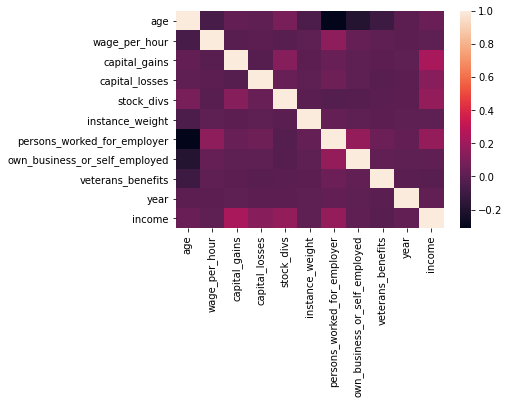

In [33]:
sns.heatmap(census.corr())
